In [ ]:
medical_charges_url='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7a021f0612a0>)

In [ ]:
!pip install pandas --quiet
import pandas as pd
medical_df=pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Following code blocks are for exploring and gaining insights from the dataset:-

In [ ]:
medical_df.info()
medical_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
!pip install plotly matplotlib seaborn --quiet
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'           #optional setting for better visualization

In [ ]:
#medical_df.age.head()
fig=px.histogram(medical_df,x='age',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medical_df,x='bmi',color_discrete_sequence=['red'],title='Dsitribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medical_df,x='charges',color='smoker',color_discrete_sequence=['green','grey'],title='Distribution of Charges (annually)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()
px.histogram(medical_df,x='smoker',color='sex',title='Dsitribution of Smokers')

In [ ]:
fig=px.scatter(medical_df,x='age',y='charges',color='smoker',hover_data=['sex'],opacity=0.8,title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig=px.scatter(medical_df,x='bmi',y='charges',color='smoker',hover_data=['sex'],opacity=0.8,title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()            #interesting hmmmmm

In [ ]:
px.violin(medical_df,x='children',y='charges',title="Chiildren vs Charges")

In [ ]:
print(medical_df.charges.corr(medical_df.age))
print(medical_df.charges.corr(medical_df.bmi))
smoker_val={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_val)
medical_df.charges.corr(smoker_numeric)               #hmm smoking influences charges much more than others

0.2990081933306476
0.19834096883362895


0.787251430498478

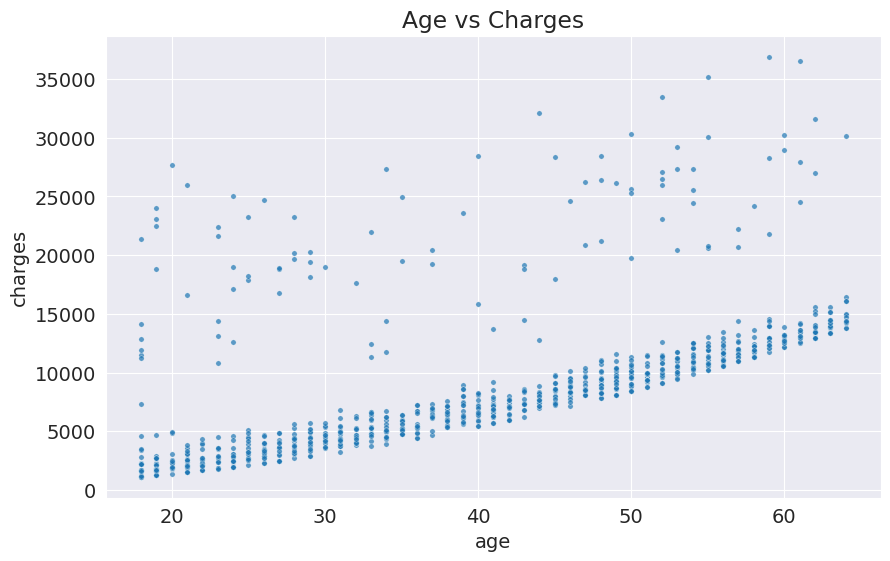

In [ ]:
non_smoker_df=medical_df[medical_df.smoker=='no']
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15);

Model fitting, predictions and plotting:-

In [ ]:
!pip install scikit-learn --quiet
import numpy as np

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
model.fit(inputs,targets)                  #the input(s) are used to predict the target
model.predict(np.array([[33]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([6727.79356686])

In [ ]:
predictions=model.predict(inputs)
print(predictions)
targets.head()

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160


In [ ]:
print(model.coef_)
model.intercept_

[267.24891283]


-2091.4205565650864

Text(0.5, 1.0, 'SimpleLinearRegression on medical data for non-smokers')

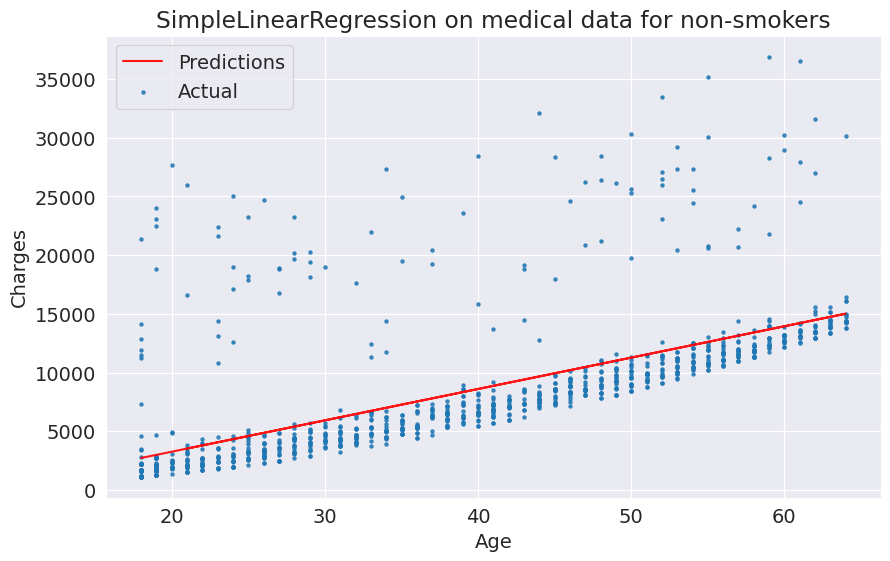

In [ ]:
plt.plot(inputs,predictions,'r',alpha=0.9);
plt.scatter(inputs,targets,s=5,alpha=0.8);
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Predictions','Actual'])
plt.title('SimpleLinearRegression on medical data for non-smokers')

In [ ]:
smoker_df=medical_df[medical_df.smoker=='yes']
X=smoker_df[['age']]
y=smoker_df.charges
model.fit(X,y)
predictions=model.predict(X)
with np.printoptions(threshold=100):
  print(predictions)
y.head(5)

[26093.642567   39218.85945773 28535.54338388 ... 39218.85945773
 33114.10741553 38913.62185562]


,charges
0,16884.9240
11,27808.7251
14,39611.7577
19,36837.4670
23,37701.8768


Text(0.5, 1.0, 'SimpleLinearRegression on medical data for smokers')

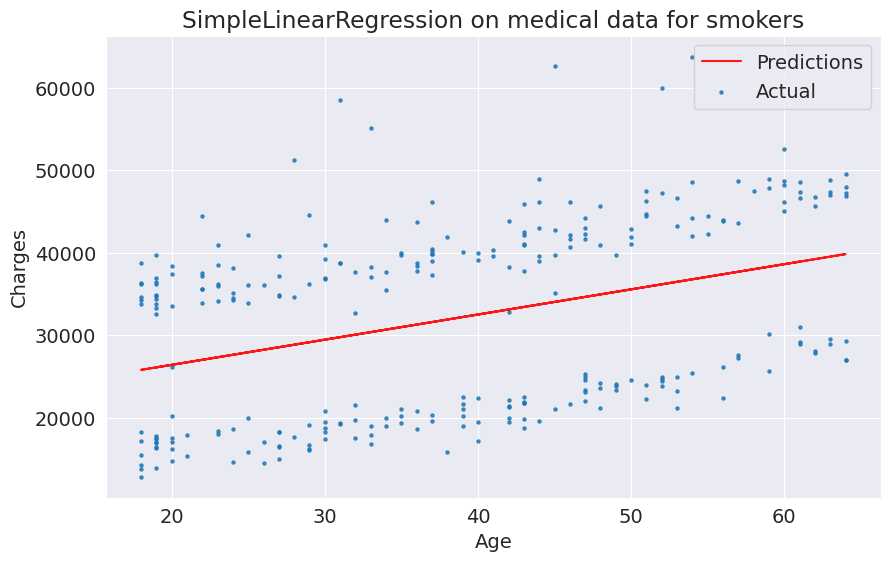

In [ ]:
plt.plot(X,predictions,'r',alpha=0.9);
plt.scatter(X,y,s=5,alpha=0.8);
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Predictions','Actual'])
plt.title('SimpleLinearRegression on medical data for smokers')

Now onto multiple linear regression:-


In [ ]:
from sklearn.metrics import mean_absolute_error
inputs,target=non_smoker_df[['age','bmi']],non_smoker_df.charges
multmodel=LinearRegression().fit(inputs,target)
predictions=multmodel.predict(inputs)
mae=mean_absolute_error(target,predictions)
print(mae)

2579.8981225824014


In [ ]:
fig=px.scatter_3d(non_smoker_df,x='age',y='bmi',z='charges')
fig.update_traces(marker_size=3,marker_opacity=0.5)
fig.show()

Using categorical features for model fitting. In this case, focusing on the smokers ans sex field:-

In [ ]:
smoker_codes={'no':0,'yes':1}
sex_codes={'female':0,'male':1}
medical_df['smoker_codes']=medical_df.smoker.map(smoker_codes)
medical_df['sex_codes']=medical_df.sex.map(sex_codes)
print(medical_df.charges.corr(medical_df.smoker_codes))
medical_df.charges.corr(medical_df.sex_codes)

0.787251430498478


0.057292062202025484

In [ ]:
inputs,target=medical_df[['age','bmi','children','smoker_codes','sex_codes']],medical_df.charges
multmodel=LinearRegression().fit(inputs,target)
predictions=multmodel.predict(inputs)
mae=mean_absolute_error(target,predictions)
print(mae)

4178.65598727367


also including one-hot encoding for the 'region' field:-

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,smoker_codes,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0.0,0.0,0.0,1.0


In [ ]:
inputs,target=medical_df[['age','bmi','children','smoker_codes','sex_codes','northeast','northwest','southeast','southwest']],medical_df.charges
multmodel=LinearRegression().fit(inputs,target)
predictions=multmodel.predict(inputs)
mae=mean_absolute_error(target,predictions)
print(mae)                                             #bit more accurate predictions

4170.886894163586


Applying model improvements - standardization (feature scaling) on the fields 'age', 'bmi' and 'childern' as we can see below that their weight towards the predictions do not match their correlation with 'charges' (as their range of values are limited) :-

In [ ]:
print(multmodel.coef_)
multmodel.intercept_

[  256.85635254   339.19345361   475.50054515 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]


-12525.547811195444

In [ ]:
input_cols=['age','bmi','children','smoker_codes','sex_codes','northeast','northwest','southeast','southwest']
weights_df=pd.DataFrame({'feature':np.append(input_cols,1),'weightage':np.append(multmodel.coef_,multmodel.intercept_)})
weights_df

,feature,weightage
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_codes,23848.534542
4,sex_codes,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_cols=['age','bmi','children']
scaler.fit(medical_df[numeric_cols])
print(scaler.mean_)
scaler.var_

[39.20702541 30.66339686  1.09491779]


array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs=scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
categorical_data=medical_df[['smoker_codes','sex_codes','northeast','northwest','southeast','southwest']].values
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)
target=medical_df.charges
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.1)
finalmodel=LinearRegression().fit(x_train,y_train)
predictions=finalmodel.predict(x_test)
mae=mean_absolute_error(y_test,predictions)
print(mae)


4715.534792542612


<ipython-input-65-5a2f0ddccbe1>:3: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



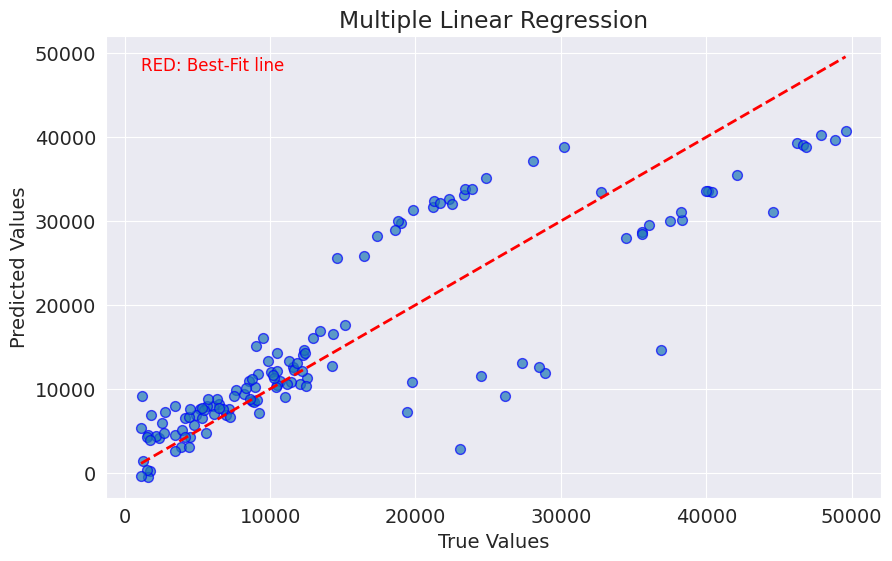

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions,alpha=0.7,edgecolors='b',s=50)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2,color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression')
plt.text(y_test.min(),y_test.max(), 'RED: Best-Fit line',fontsize=12,verticalalignment='top',color='red')
plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(max_iter=1000).fit(x_train,y_train)
predictions=sgdmodel.predict(x_test)
mae=mean_absolute_error(y_test,predictions)
print(mae)

4724.5098725212265


<ipython-input-73-cc6bbc4ce209>:3: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



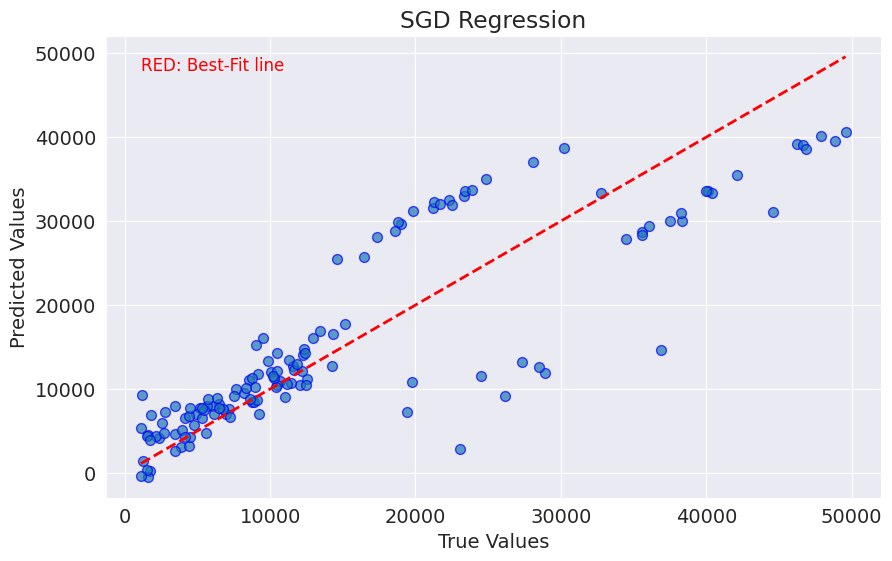

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions,alpha=0.7,edgecolors='b',s=50)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2,color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('SGD Regression')
plt.text(y_test.min(),y_test.max(), 'RED: Best-Fit line',fontsize=12,verticalalignment='top',color='red')
plt.show()

Now i am building a model for predicting charges for non-smokers. The previous model included smoker data as well and by removing that metric, i believe the predictions will be slightly moer accurate.

In [ ]:
#onehotencoding
enc.fit(non_smoker_df[['region']])
one_hot=enc.transform(non_smoker_df[['region']]).toarray()
non_smoker_df[['northeast','northwest','southeast','southwest']]=one_hot
#categorical features
sex_code={'female':0,'male':1}
non_smoker_df['sex_codes']=non_smoker_df.sex.map(sex_code)
#standardization - feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_cols=['age','bmi','children']
scaler.fit(non_smoker_df[numeric_cols])
scaled_inputs=scaler.transform(non_smoker_df[numeric_cols])
#now onto model fitting:-
categorical_data=non_smoker_df[['sex_codes','northeast','northwest','southeast','southwest']].values
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)
target=non_smoker_df.charges
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.1)
finalmodel=LinearRegression().fit(x_train,y_train)
predictions=finalmodel.predict(x_test)
mae=mean_absolute_error(y_test,predictions)
print(mae)


2333.6694980459038


<ipython-input-81-cac58fe1d8d4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-cac58fe1d8d4>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-83-2dabbb920288>:3: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



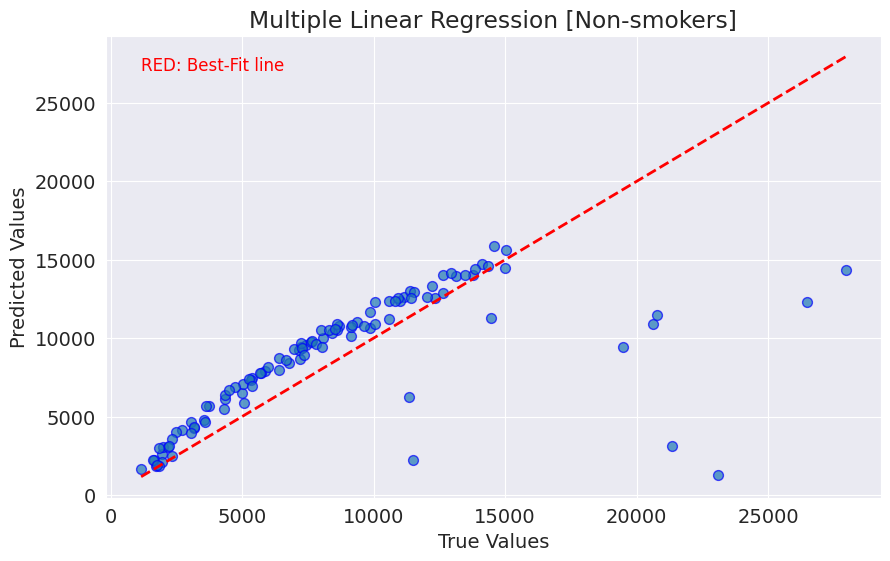

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions,alpha=0.7,edgecolors='b',s=50)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2,color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression [Non-smokers]')
plt.text(y_test.min(),y_test.max(), 'RED: Best-Fit line',fontsize=12,verticalalignment='top',color='red')
plt.show()

The END.